In [127]:
library(readxl)

metabolites = read_excel('./LM2021-12430-东部战区总医院-小鼠肠道组织/LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/6.差异代谢物/差异代谢物.xlsx',sheet = 4)

colnames(metabolites)

metabolites1 = metabolites[,c('Metabolites','kegg','VIP','P-value','log2(FC)')]

library(dplyr)

colnames(metabolites1)[4:5] = c('pvalue','log2fc')

se = metabolites1 %>% filter(VIP >1) %>% subset(.,  pvalue < 0.05)  # abs(log2fc) > 1 &

name = se$Metabolites

[1] "ID"                   "m/z"                  "Retention time (min)"
 [4] "Ion mode"             "Metabolites"          "Compound ID"         
 [7] "Super Class"          "Class"                "Sub Class"           
[10] "kegg"                 "Score"                "Fragmentation Score" 
[13] "Adducts"              "Formula"              "Mass Error (ppm)"    
[16] "VIP"                  "P-value"              "adj.P-value"         
[19] "log2(FC)"             "FC"                   "average(KO-CLP)"     
[22] "average(WT-CLP)"      "KO-CLP1"              "KO-CLP2"             
[25] "KO-CLP3"              "KO-CLP4"              "KO-CLP5"             
[28] "KO-CLP6"              "KO-CLP7"              "KO-CLP8"             
[31] "WT-CLP1"              "WT-CLP2"              "WT-CLP3"             
[34] "WT-CLP4"              "WT-CLP5"              "WT-CLP6"             
[37] "WT-CLP7"              "WT-CLP8"

In [128]:
length(name)

[1] 51

In [129]:
r = read.csv('/data/workdirV6/6.otu-metabolite-luming/KO.CLP.cor.r.csv',row.names = 1)

In [130]:
p = read.csv('/data/workdirV6/6.otu-metabolite-luming/KO.CLP.cor.p.csv',row.names = 1)

In [131]:
cmt = t(r[name,])

In [132]:
pmt = t(p[name,])

In [133]:
library(reshape2)

In [134]:
df <-melt(cmt,value.name= "cor")

In [135]:
df$pvalue <- as.vector(pmt)

In [136]:
if(!is.null(pmt)){
    ssmt <- pmt< 0.01
    pmt[ssmt] <- '**'
    smt <- pmt > 0.01& pmt < 0.05
    pmt[smt] <- '*'
    pmt[!ssmt&!smt]<- ''
    } else{
    pmt <- F
    }

In [137]:
library(pheatmap)

In [138]:
kind = c('g__Akkermansia_s__Akkermansia_muciniphila',
'g__Bacteroides_s__Bacteroides_caecimuris',
'g__Helicobacter_s__Helicobacter_hepaticus',
'g__Acutalibacter_s__Acutalibacter_muris',
'g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32'
)

bad = c('g__Muribaculum_s__Muribaculum_sp..TLL.A4',
'g__Muribaculum_s__Muribaculum_sp..H5',
'g__Muribaculum_s__Muribaculum_intestinale',
'g__Duncaniella_s__Duncaniella_sp..B8',
'g__Lactobacillus_s__Lactobacillus_murinus'
)

In [139]:
dd = as.data.frame(c(kind,bad))

In [140]:
dd$type = c(rep('kind',5),rep('bad',5))

In [141]:
dd = dd %>% tibble::column_to_rownames(.,'c(kind, bad)')

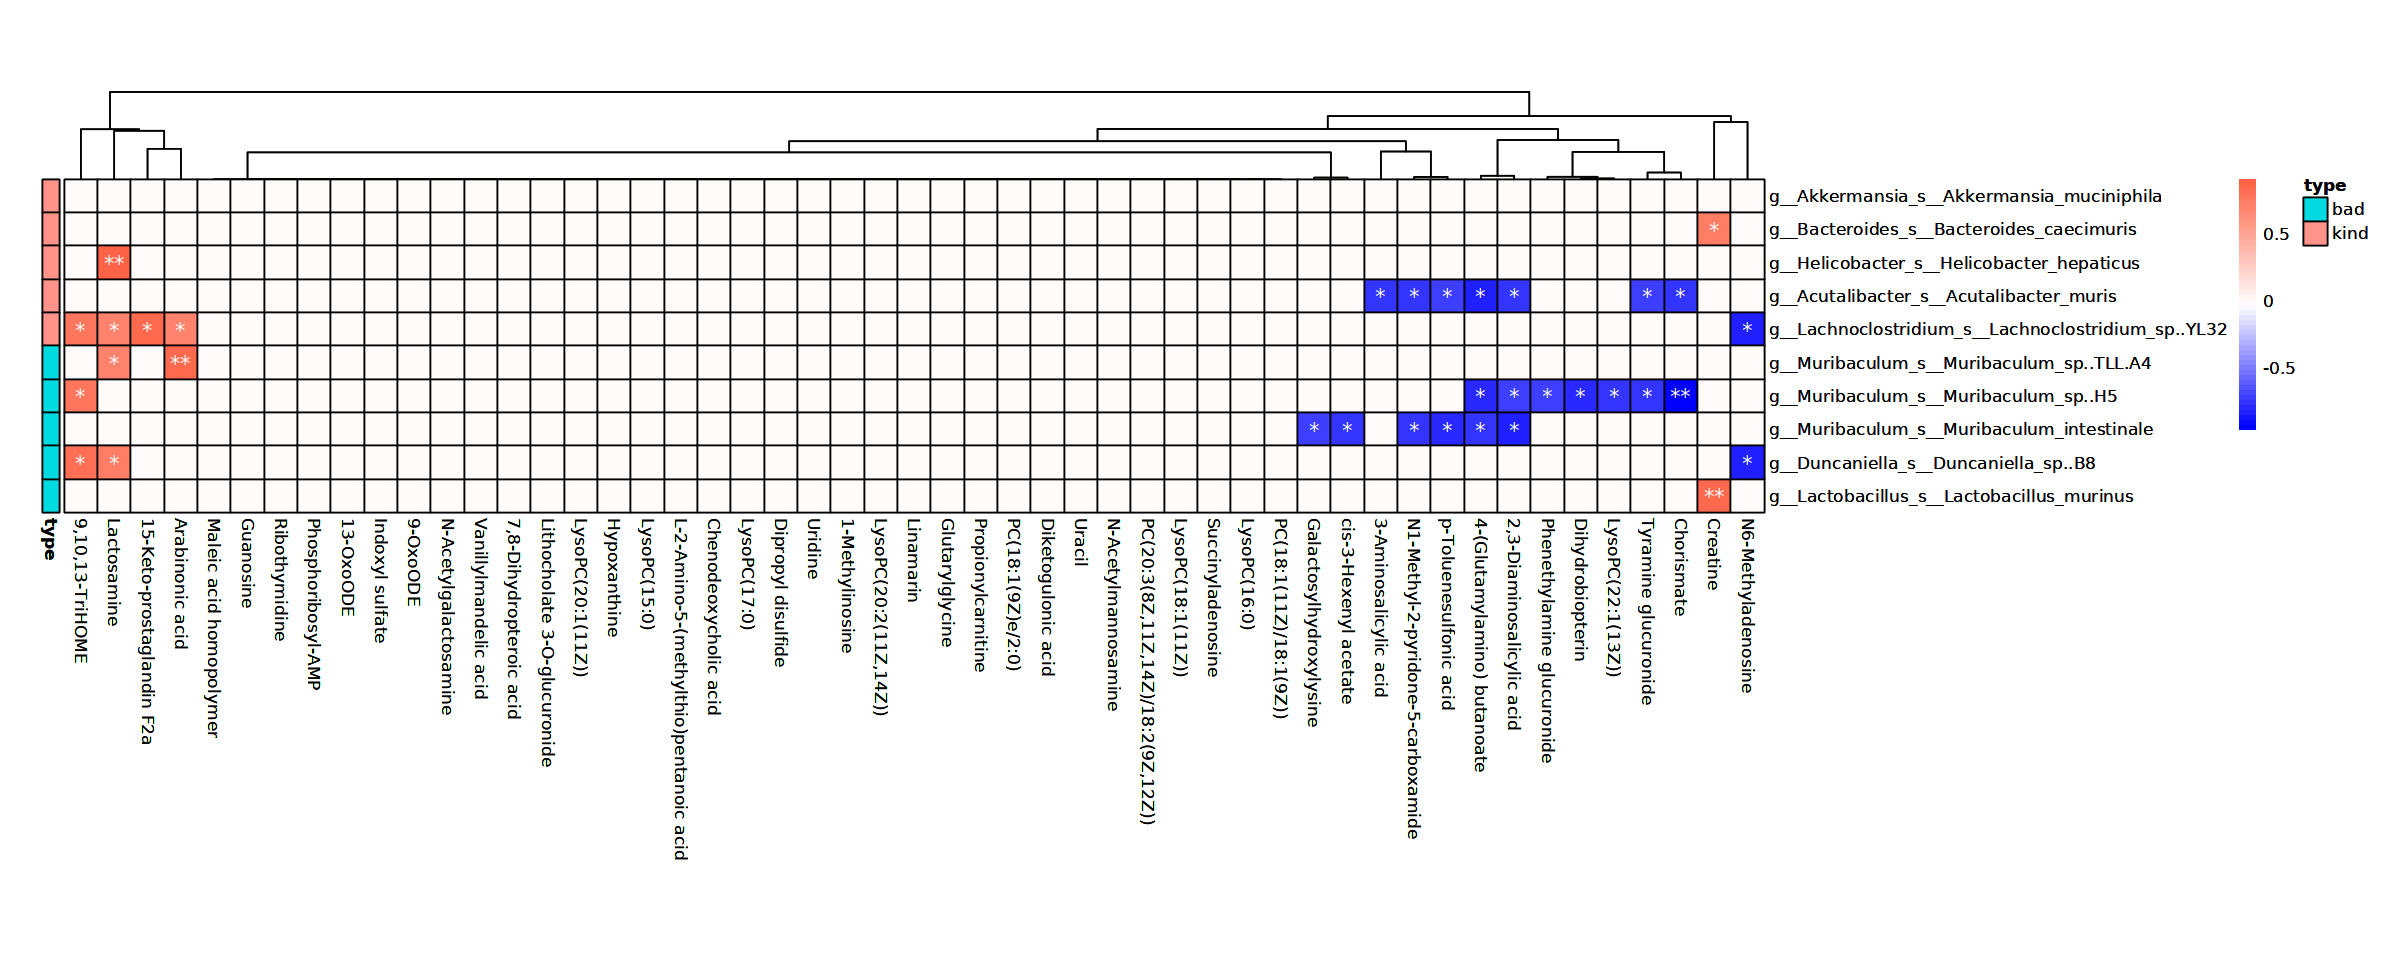

In [142]:
 mycol<-colorRampPalette(c("blue","white","tomato"))(50)
    options(repr.plot.height = 8,repr.plot.width = 20)
    p = pheatmap(cmt,scale = "none",cluster_row = F, cluster_col = T, border='black',
    display_numbers = pmt,fontsize_number = 12, number_color = "white",
    cellwidth = 20, cellheight =20,color=mycol, annotation_row = dd)
    
    print(p)

In [144]:
pdf('koclpvswtclp-diffout-diffmetabolites.pdf',height = 6,width = 20)
print(p)
dev.off()

png 
  2